In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [23]:
dataset = pd.read_csv('../dataset/online_shoppers_intention.csv')
dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Rad sa nedostajućim vrednostima

In [24]:
dataset.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [25]:
# Vidimo da nema nedostajucih vrednosti

In [26]:
dataset.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [27]:
# dataset_copy = dataset
# dataset_copy = dataset_copy.drop(columns=['Month', 'VisitorType'])

### Matrica korelacije pomoću heatmap

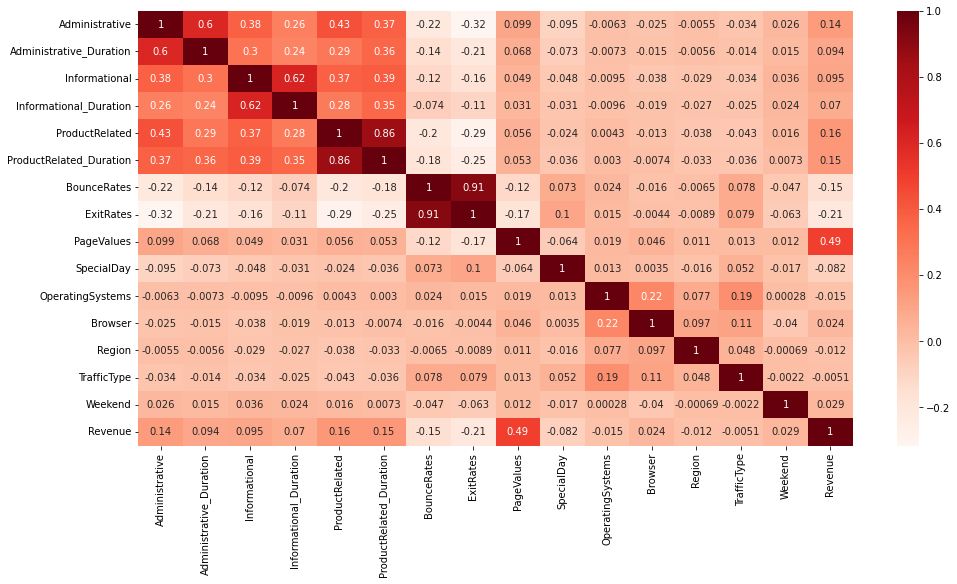

In [28]:
plt.figure(figsize = (16,8))
corr_matrix = dataset.corr(numeric_only=True)
hm=sns.heatmap(corr_matrix, cmap = plt.cm.Reds, annot=True)

### Vidimo na mapi atribute sa visokom korelacijom i izbacujemo ih

In [29]:
# To su atributi ProductRelated i ProductRelated Duration (0.86)
# I atributi BounceRates i ExitRates (0.91)

dataset = dataset.drop(columns=['ProductRelated', 'BounceRates'])

### Transformisanje kategoričkih atributa

In [30]:
new_dataset = pd.get_dummies(dataset, columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'])

In [31]:
revenue = dataset['Revenue'].unique()
num_class = revenue.shape[0]
zipped = zip(revenue, range(num_class))
dictionary = dict(zipped)

new_dataset = new_dataset.replace(dictionary)
new_dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,64.000000,0.100000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2.666667,0.140000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,627.500000,0.050000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,1783.791667,0.029031,12.241717,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12326,0,0.0,0,0.0,465.750000,0.021333,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12327,0,0.0,0,0.0,184.250000,0.086667,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12328,4,75.0,0,0.0,346.000000,0.021053,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [32]:
new_dataset.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'ExitRates',
       'PageValues', 'SpecialDay', 'Revenue', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'Tra

In [33]:
new_dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,1194.746220,0.043073,5.889258,0.061427,0.154745,0.035118,...,0.000243,0.000081,0.000811,0.001379,0.016058,0.137388,0.006894,0.855718,0.767397,0.232603
std,3.321784,176.779107,1.270156,140.749294,1913.669288,0.048597,18.568437,0.198917,0.361676,0.184084,...,0.015597,0.009006,0.028468,0.037107,0.125705,0.344271,0.082745,0.351390,0.422509,0.422509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,184.137500,0.014286,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,598.936905,0.025156,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,1464.157214,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,63973.522230,0.200000,361.763742,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
new_dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,64.000000,0.100000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2.666667,0.140000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,627.500000,0.050000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,1783.791667,0.029031,12.241717,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12326,0,0.0,0,0.0,465.750000,0.021333,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12327,0,0.0,0,0.0,184.250000,0.086667,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12328,4,75.0,0,0.0,346.000000,0.021053,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0


### Rad sa autlajerima

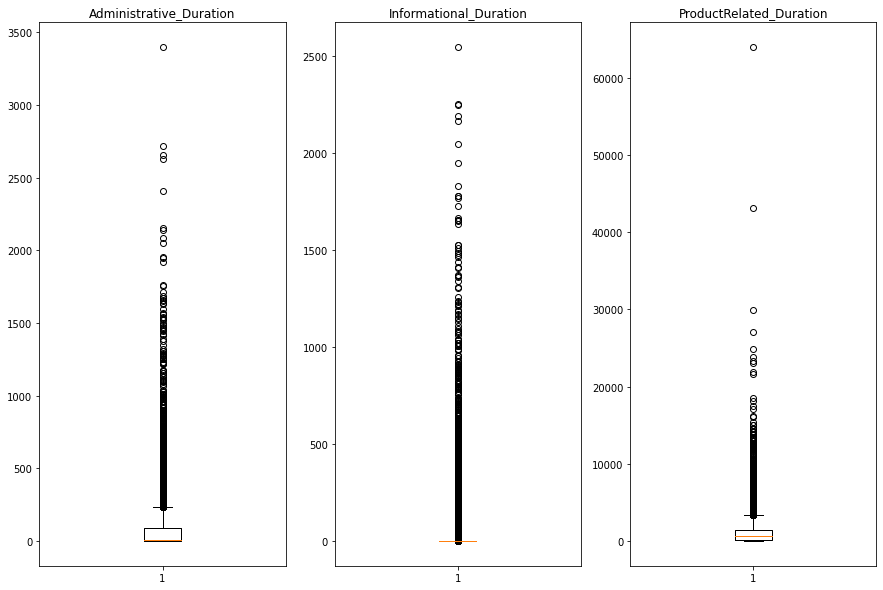

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.boxplot(dataset["Administrative_Duration"])
ax1.set_title("Administrative_Duration")
ax2.boxplot(dataset["Informational_Duration"])
ax2.set_title("Informational_Duration")
ax3.boxplot(dataset["ProductRelated_Duration"])
ax3.set_title("ProductRelated_Duration")

plt.show()

In [36]:
# Vidimo da ima autlajera koje ćemo ukloniti pomoću interkartilnog opsega

In [37]:
Q1 = new_dataset['Administrative_Duration'].quantile(0.25)
Q3 = new_dataset['Administrative_Duration'].quantile(0.75)
IQR = Q3 - Q1
upper_limit_admin_dur = Q3 + (1.5*IQR)

In [38]:
Q1 = new_dataset['Informational_Duration'].quantile(0.25)
Q3 = new_dataset['Informational_Duration'].quantile(0.75)
IQR = Q3 - Q1
upper_limit_info_dur = Q3 + (1.5*IQR)

In [39]:
Q1 = new_dataset['ProductRelated_Duration'].quantile(0.25)
Q3 = new_dataset['ProductRelated_Duration'].quantile(0.75)
IQR = Q3 - Q1
upper_limit_prod_dur = Q3 + (1.5*IQR)

In [40]:
new_dataset = new_dataset[(new_dataset["Administrative_Duration"] < upper_limit_admin_dur) |
                  (new_dataset["Informational_Duration"] < upper_limit_info_dur) | 
                  (new_dataset["ProductRelated_Duration"] < upper_limit_prod_dur)]

### Spajanje skupa atributa u novi preprocesirani skup

In [41]:
new_dataset.to_csv('../dataset/preprocessed.csv', index=False)

In [42]:
pp = pd.read_csv('../dataset/preprocessed.csv')
pp

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Revenue,Month_Aug,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,64.000000,0.100000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2.666667,0.140000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,627.500000,0.050000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,3,145.0,0,0.0,1783.791667,0.029031,12.241717,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12056,0,0.0,0,0.0,465.750000,0.021333,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12057,0,0.0,0,0.0,184.250000,0.086667,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
12058,4,75.0,0,0.0,346.000000,0.021053,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
